In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
al=sns.load_dataset("iris")
al.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Import data

In [3]:
x=al.iloc[ : , 0:4]
y=al.iloc[ : , -1:]

In [4]:
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
y

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica


Model of RandomForestClassifier

In [10]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=100)
model.fit(x,y)
model.predict([[5,3,2,6]])

C:\Users\Admin\AppData\Local\Temp/ipykernel_5168/3846388825.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x,y)


array(['setosa'], dtype=object)

In [11]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=100)
model.fit(x,y)
model.predict([[10,3,2,6]])

C:\Users\Admin\AppData\Local\Temp/ipykernel_5168/1474045140.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x,y)


array(['virginica'], dtype=object)

Model accuracy

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
predictions=model.predict(x_test)
predictions

array(['virginica', 'setosa', 'versicolor', 'setosa', 'setosa', 'setosa',
       'versicolor', 'setosa', 'virginica', 'setosa', 'virginica',
       'virginica', 'versicolor', 'virginica', 'virginica', 'setosa',
       'versicolor', 'virginica', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'versicolor', 'setosa',
       'versicolor', 'versicolor', 'versicolor', 'virginica'],
      dtype=object)

In [15]:
score=model.score(x_test,y_test)
score

1.0

In [17]:
from sklearn import metrics
metrics.accuracy_score(y_test,predictions)

1.0

Confusion metrics

In [18]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_test, predictions)
cm

array([[10,  0,  0],
       [ 0, 10,  0],
       [ 0,  0, 10]], dtype=int64)

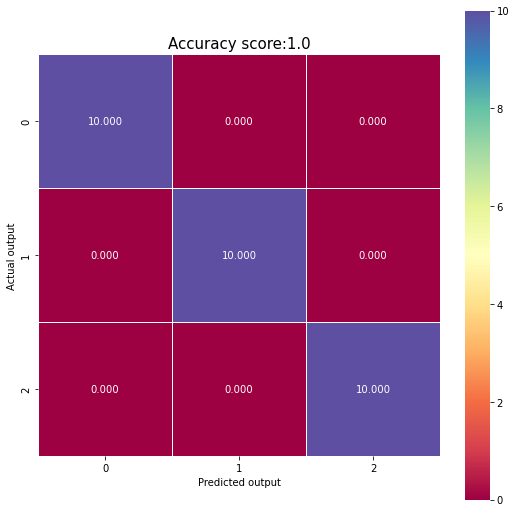

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot= True, fmt=".3f", linewidths=.5, square=True,cmap='Spectral');
plt.ylabel("Actual output");
plt.xlabel("Predicted output");
all_sample_title="Accuracy score:{0}".format(score);
plt.title(all_sample_title, size=15);